In [1]:
import pandas as pd
from os.path import join
import torch
from call_methods import make_network
from utils.plot_utils import plot_tsne_with_subsets, plot_mean_predictions, plot_distribution
import numpy as np

In [2]:
path = '/Users/ed_aguilar/Documents/Github/hcatgnet/results/learning/results_GNN/Fold_1_test_set/Fold_2_val_set'

In [3]:
data = pd.read_csv(join(path, 'embeddings.csv'), index_col=0)
data

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,ddG_exp,ddG_pred,index,set,tSNE1,tSNE2
0,-0.006117,1.009677,0.230504,-0.003041,0.784379,0.647050,-0.001907,1.535800,-0.008041,0.873375,...,-0.008115,-0.002085,0.169812,-0.010859,8.538893,7.752192,185,training,-22.474672,-9.802017
1,-0.006630,1.176015,0.195251,-0.010393,0.821883,0.845687,-0.003149,1.564637,-0.009029,1.090926,...,-0.010275,0.033160,0.165936,-0.013384,14.662326,12.339864,359,training,-3.815729,33.612823
2,-0.005133,0.878394,1.649886,0.533875,-0.002165,-0.002388,-0.001056,0.313971,-0.005884,0.401437,...,0.072803,-0.017594,-0.019728,0.104079,-8.222192,-7.708202,420,training,24.723670,12.029326
3,-0.005299,0.895826,0.352424,-0.001651,0.788901,0.667769,-0.001990,1.492461,-0.006259,0.333043,...,-0.006543,0.095368,0.141019,-0.008176,9.809491,10.950994,467,training,-35.637867,9.166286
4,-0.005299,1.001705,0.597887,-0.001651,0.701825,0.654012,-0.001170,0.788731,-0.006259,0.078418,...,-0.007092,-0.013931,0.265512,-0.007741,9.234157,7.665795,48,training,-14.387384,-7.389633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,-0.007424,1.741818,0.661620,-0.006169,1.127972,0.862728,-0.002546,1.764730,-0.010784,-0.000802,...,-0.010186,-0.015800,0.286725,-0.012766,-11.366404,-9.562195,632,test,-24.088148,-14.565998
63,-0.006443,0.851444,0.611593,-0.001651,0.701825,0.654012,-0.001170,1.492461,-0.010930,0.293035,...,-0.005371,0.018990,0.092676,-0.005861,9.809491,8.783476,641,test,-16.705267,-4.906676
64,-0.006117,1.009677,0.297810,-0.003041,0.743157,0.637383,-0.001460,1.535800,-0.008041,0.884165,...,-0.007200,-0.012290,0.152881,-0.009733,10.456662,9.588227,646,test,-18.595500,-6.718899
65,-0.007241,1.559277,0.527550,-0.005326,1.166589,0.964762,-0.002012,1.714289,-0.010646,0.167911,...,-0.008649,-0.011899,0.259536,-0.011011,10.206749,6.534754,657,test,-24.831310,-18.323915


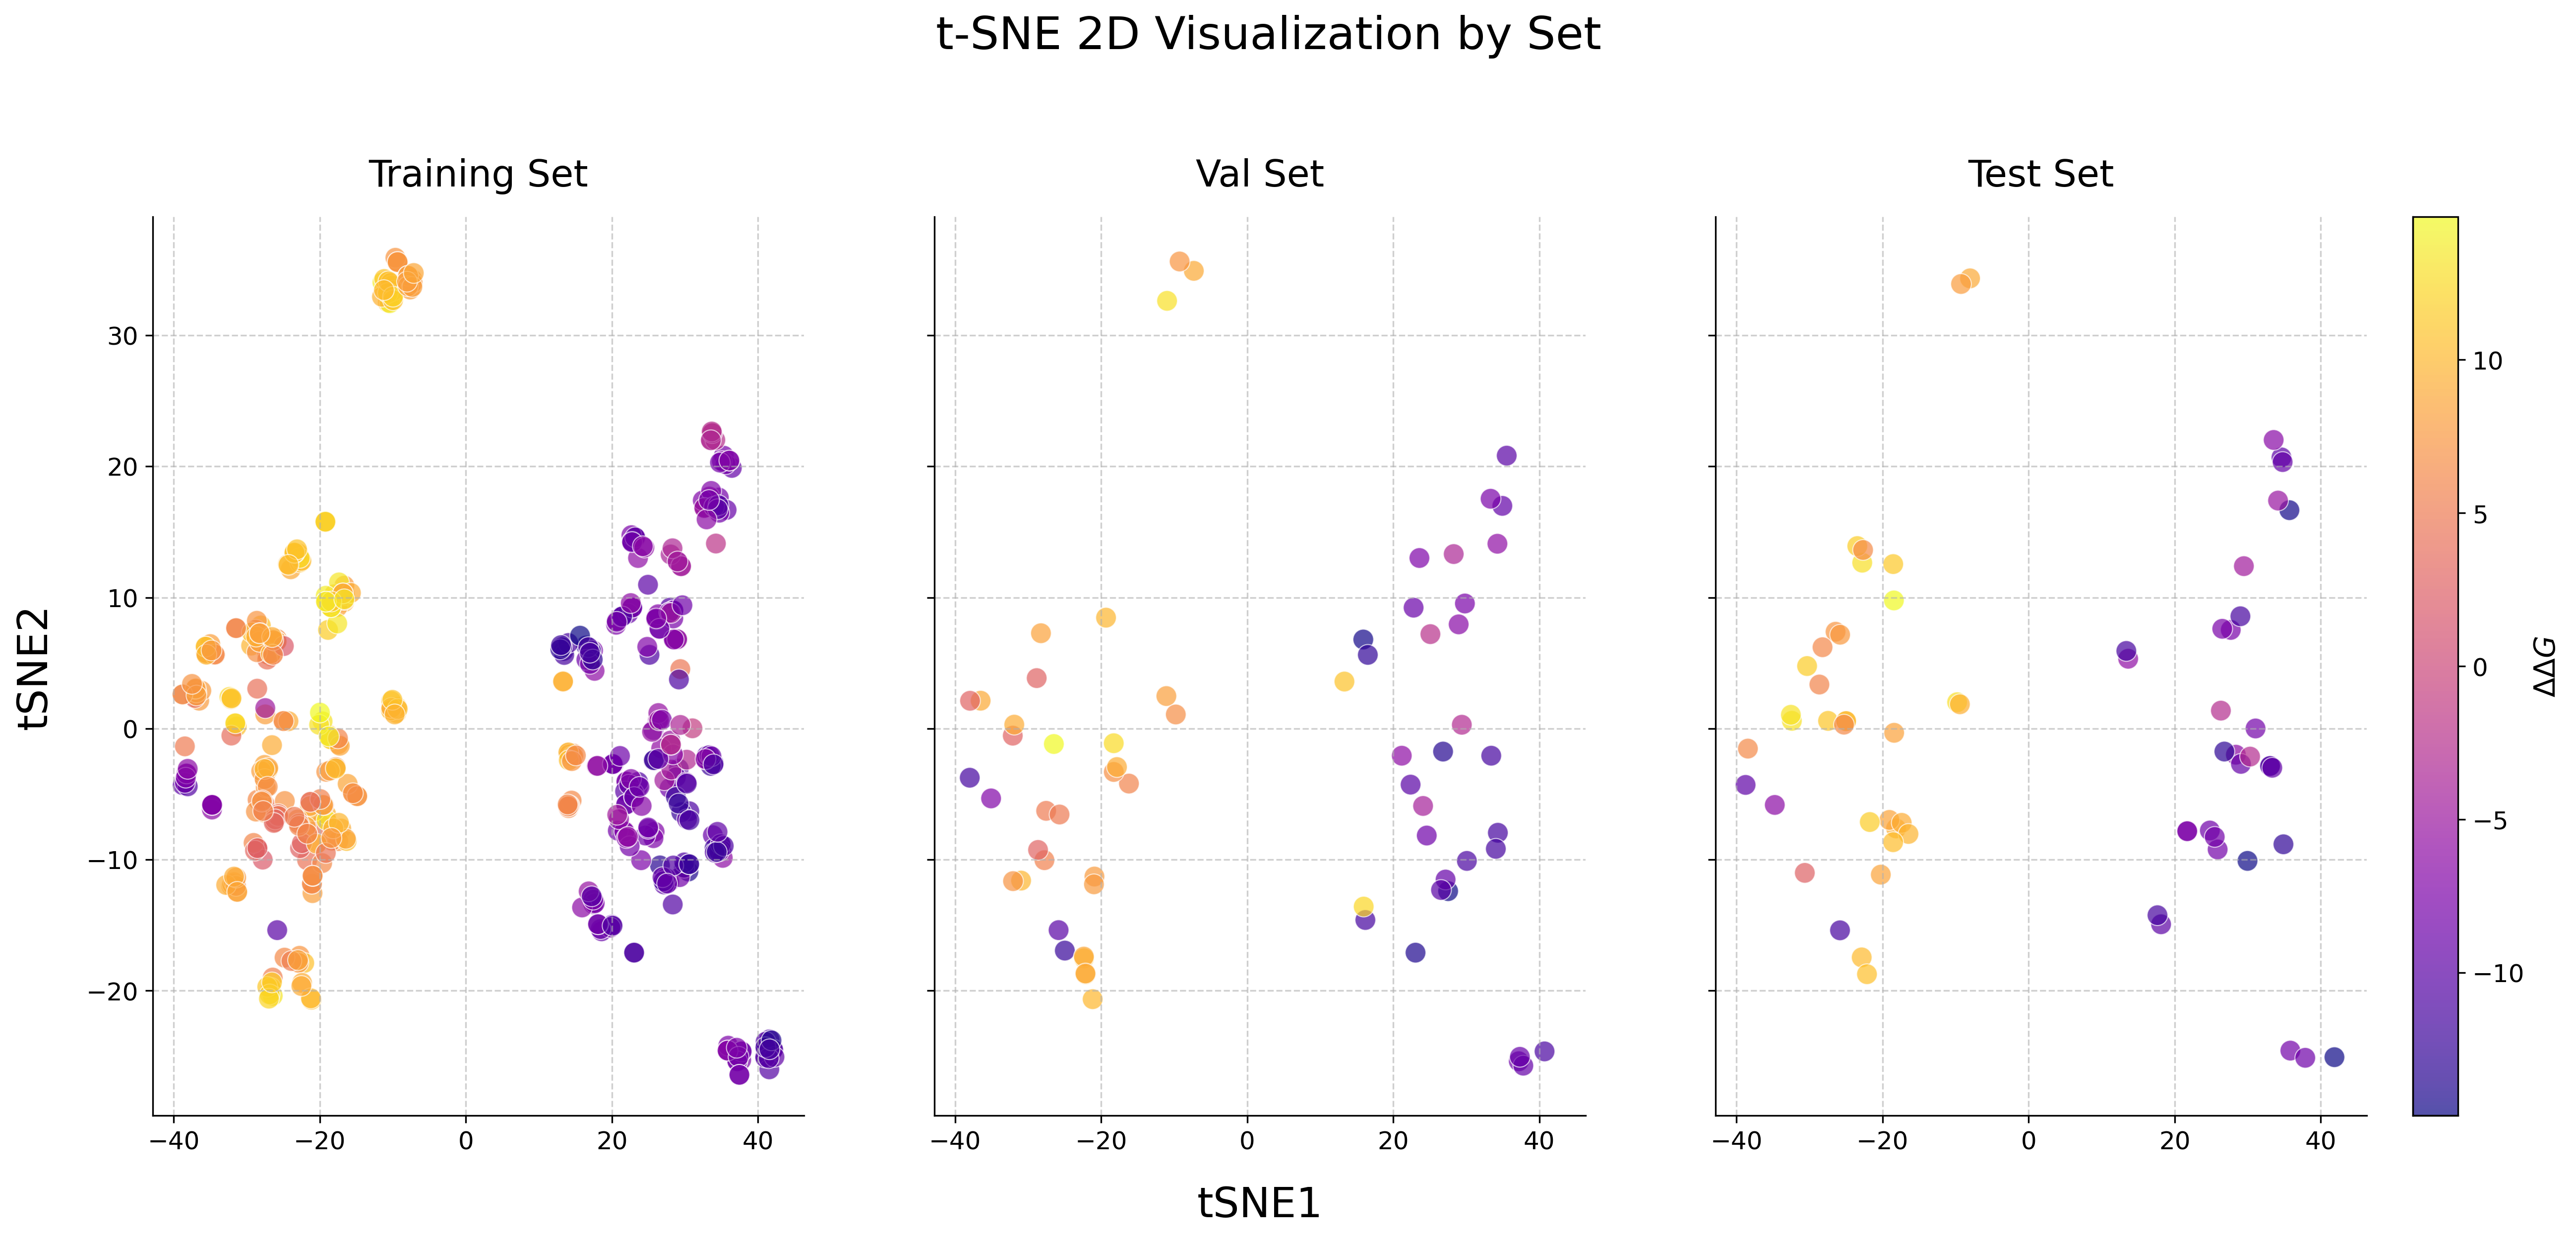

In [4]:
plot_tsne_with_subsets(data, feature_columns=[f'{i}' for i in range(128)], color_column='ddG_exp', set_column='set', show=True)

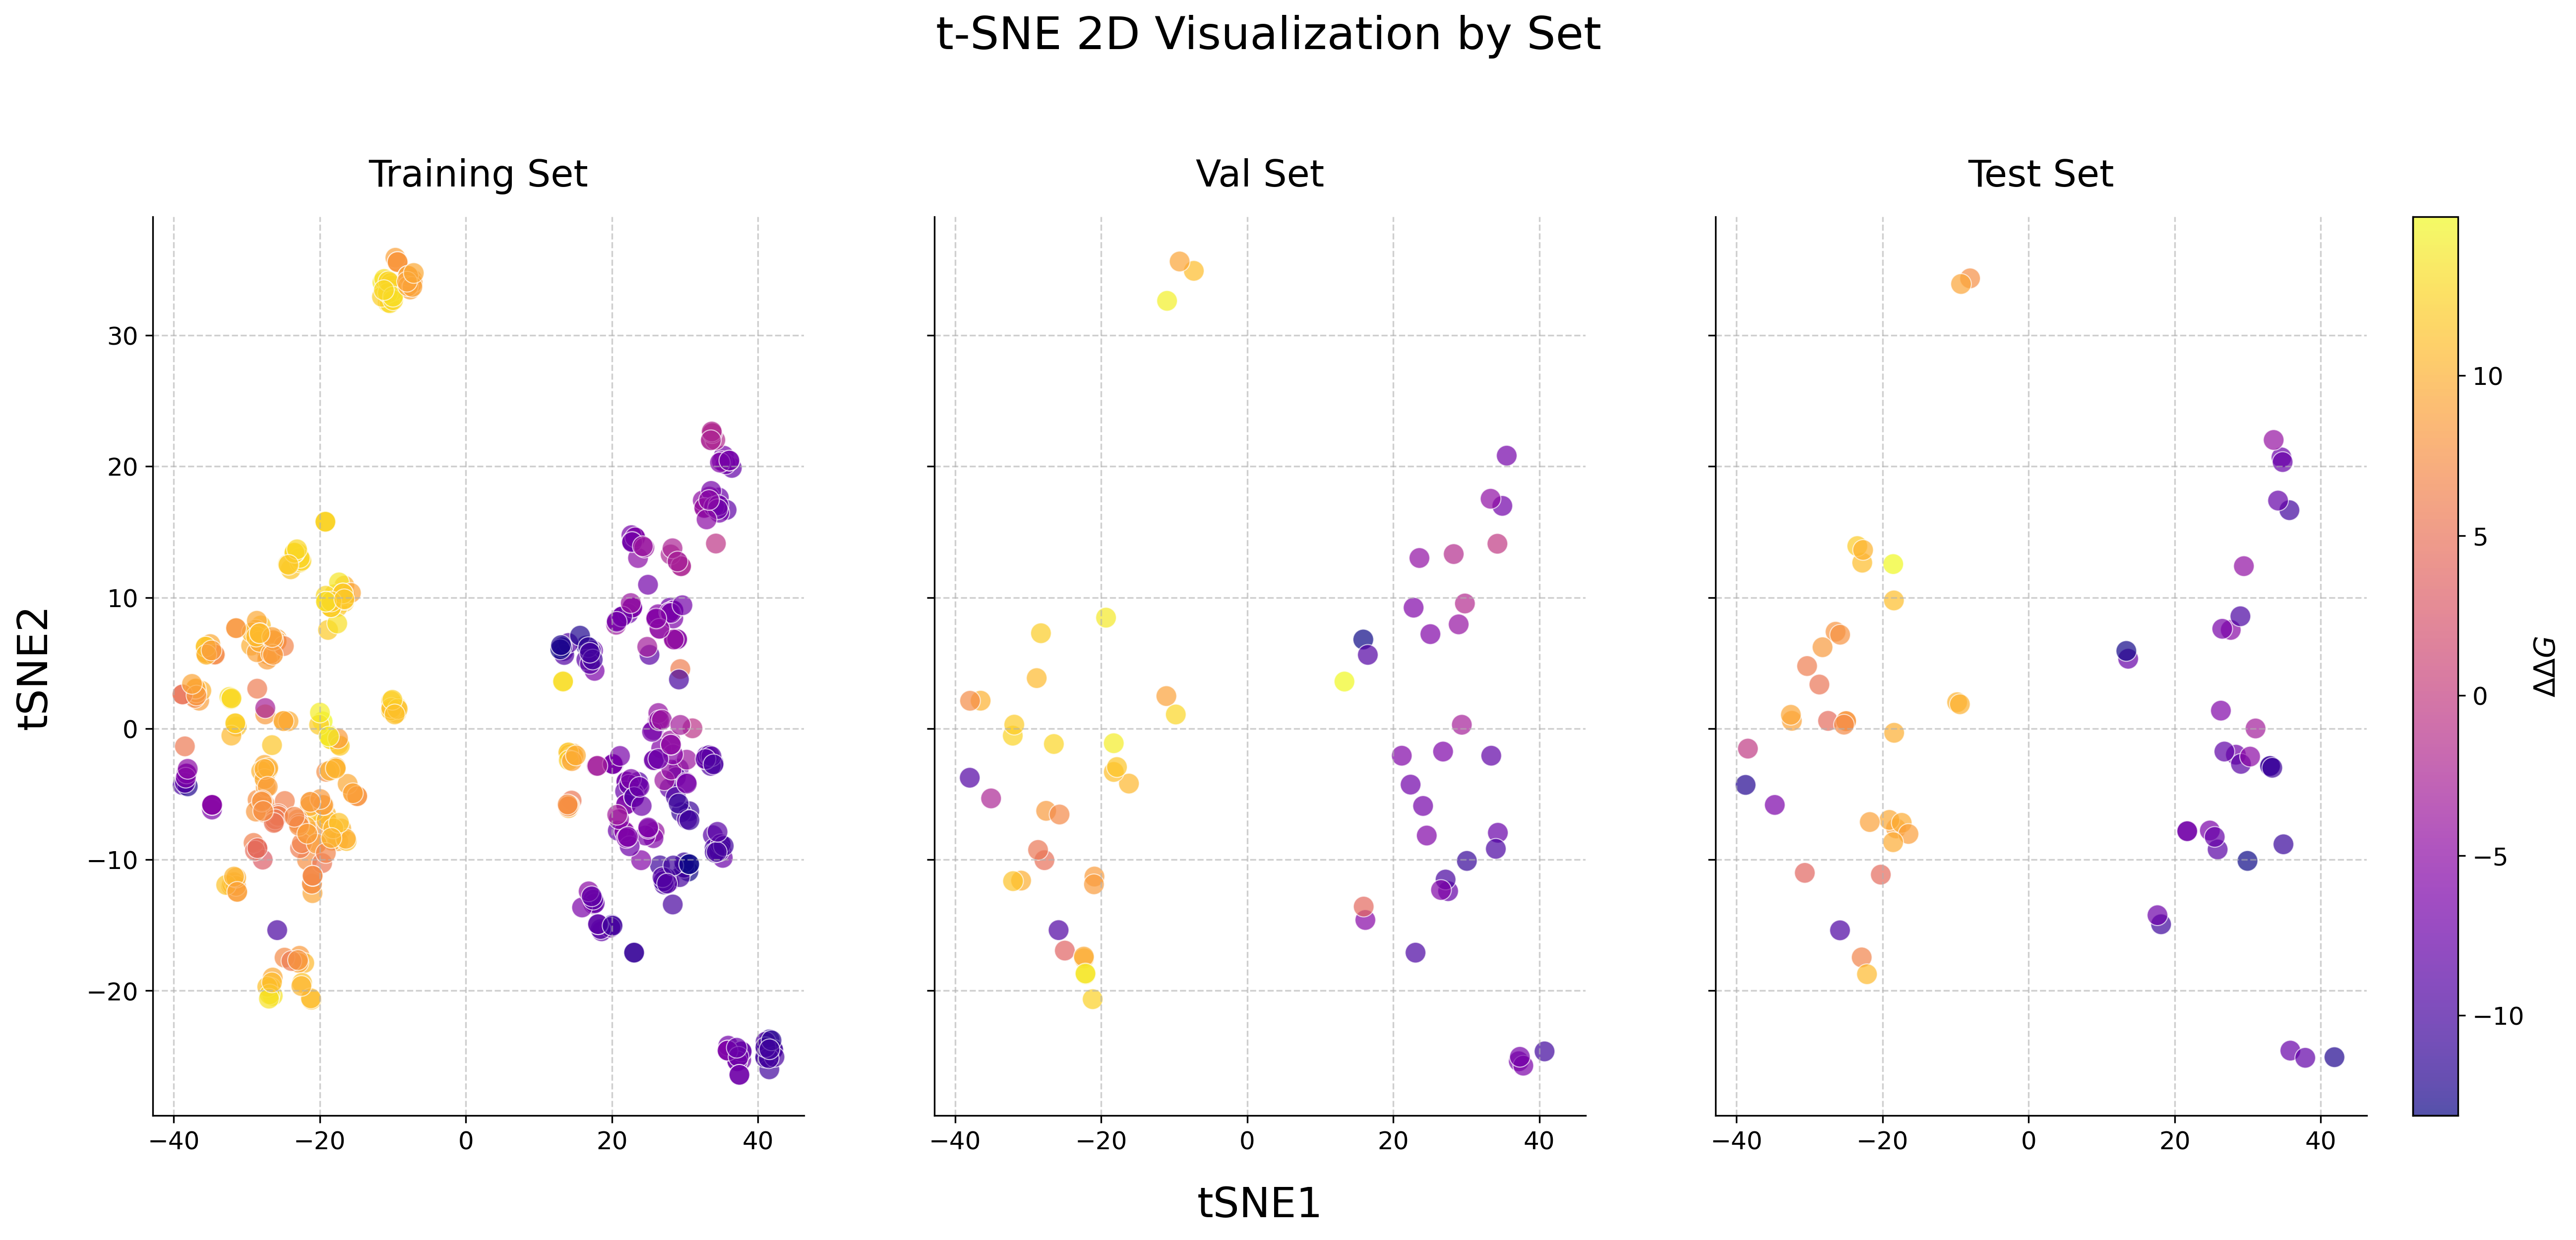

In [5]:
plot_tsne_with_subsets(data, feature_columns=[f'{i}' for i in range(128)], color_column='ddG_pred', set_column='set', show=True)

In [6]:
results_learning = pd.read_csv('/Users/ed_aguilar/Documents/Github/hcatgnet/results/learning/GNN_vs_gb/predictions_all.csv')

results_learning = results_learning.groupby(['index', 'Method']).agg(
    mean_predicted_ddG=('predicted_ddG', 'mean'),
    real_ddG=('real_ddG', 'first')
).reset_index()

results_learning.loc[results_learning['Method'] == 'gb', 'Method'] = 'Gradient Boosting'
results_learning.loc[results_learning['Method'] == 'GNN', 'Method'] = 'HCat-GNet'

results_learning.sample(5)

,index,Method,mean_predicted_ddG,real_ddG
667,338,HCat-GNet,12.514185,13.374806
47,25,Gradient Boosting,-10.999013,-12.103264
268,136,HCat-GNet,-11.424689,-11.200126
540,274,HCat-GNet,8.700248,8.538893
59,31,Gradient Boosting,-11.314268,-11.157184


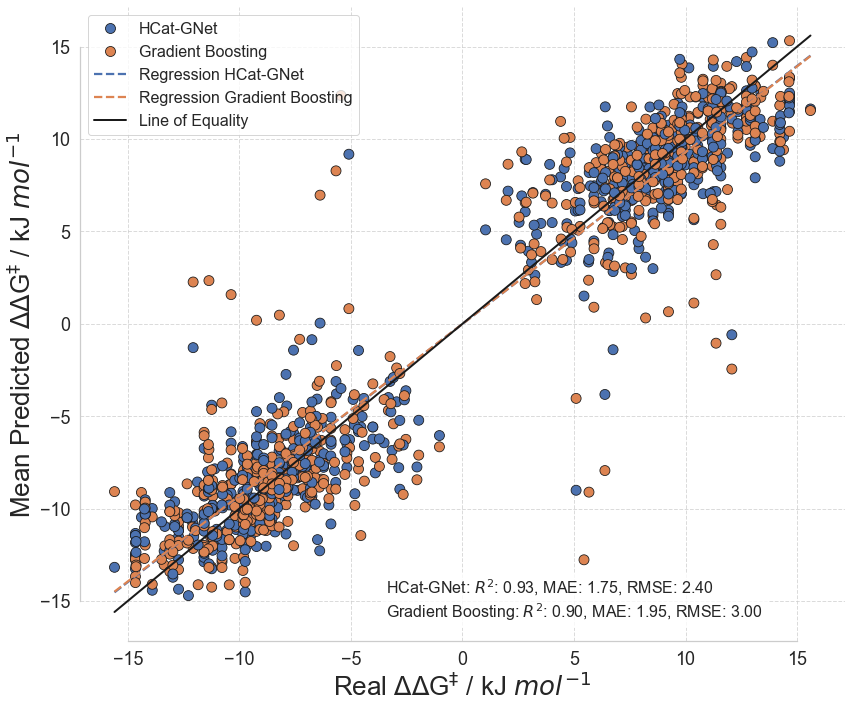

In [7]:
plot_mean_predictions(results_learning)

In [8]:
results_learning['error'] = results_learning['real_ddG'] - results_learning['mean_predicted_ddG']
results_learning

,index,Method,mean_predicted_ddG,real_ddG,error
0,0,HCat-GNet,-9.018792,-7.392910,1.625883
1,0,Gradient Boosting,-8.338829,-7.392909,0.945920
2,1,HCat-GNet,-9.571451,-9.412360,0.159091
3,1,Gradient Boosting,-9.766141,-9.412360,0.353781
4,2,HCat-GNet,7.153679,9.081853,1.928174
...,...,...,...,...,...
1331,681,Gradient Boosting,12.630236,9.964145,-2.666091
1332,682,Gradient Boosting,9.911660,8.645655,-1.266005
1333,683,Gradient Boosting,10.129855,11.427418,1.297563
1334,684,Gradient Boosting,-9.113937,5.670143,14.784080


In [9]:
high_error = results_learning.loc[abs(results_learning['error']) > 4]

In [10]:
high_error[high_error.duplicated(subset='index', keep=False)]

,index,Method,mean_predicted_ddG,real_ddG,error
232,118,HCat-GNet,7.178641,2.041678,-5.136963
233,118,Gradient Boosting,-9.654599,-14.222214,-4.567614
492,248,HCat-GNet,-1.428517,-7.573369,-6.144852
493,248,Gradient Boosting,3.025390,7.299171,4.273781


In [11]:
results_test = pd.read_csv('/Users/ed_aguilar/Documents/Github/hcatgnet/results/final_test/GNN_vs_gb/predictions_all.csv')

ees = pd.read_csv('/Users/ed_aguilar/Documents/Github/hcatgnet/data/datasets/rhcaa_final_test/raw/final_test.csv', usecols=['index', 'ee', 'temp'])

results_test = results_test.groupby(['index', 'Method']).agg(
    mean_predicted_ddG=('predicted_ddG', 'mean'),
    real_ddG=('real_ddG', 'first')
).reset_index()

results_test.loc[results_test['Method'] == 'gb', 'Method'] = 'Gradient Boosting'
results_test.loc[results_test['Method'] == 'GNN', 'Method'] = 'HCat-GNet'

results_test.shape

(104, 4)

In [12]:
results_test = pd.merge(results_test, ees, on='index')
results_test.index = results_test['index']
results_test['error'] = results_test['real_ddG'] - results_test['mean_predicted_ddG']

R=8.3145

results_test['predicted_ee'] = 100 * (np.exp(results_test['mean_predicted_ddG'] * 1000 / (R * (results_test['temp']+273.15))) - 1) / (np.exp(results_test['mean_predicted_ddG'] * 1000 / (R * (results_test['temp']+273.15))) + 1)

results_test['error_ee'] = results_test['ee'] - abs(results_test['predicted_ee'])

results_test

,index,Method,mean_predicted_ddG,real_ddG,ee,temp,error,predicted_ee,error_ee
index,,,,,,,,,
0,0,HCat-GNet,-9.710952,-11.582187,98,30,-1.871235,-95.843839,2.156161
0,0,Gradient Boosting,-9.106231,-11.582186,98,30,-2.475955,-94.746523,3.253477
1,1,HCat-GNet,-9.618758,-10.547433,97,30,-0.928675,-95.692340,1.307660
1,1,Gradient Boosting,-9.230777,-10.547433,97,30,-1.316656,-94.993460,2.006540
2,2,HCat-GNet,-8.409432,-13.341990,99,30,-4.932558,-93.131067,5.868933
...,...,...,...,...,...,...,...,...,...
49,49,Gradient Boosting,-5.232065,-1.233926,24,30,3.998138,-77.705165,-53.705165
50,50,HCat-GNet,-9.601031,1.560313,30,30,11.161345,-95.662596,-65.662596
50,50,Gradient Boosting,-8.678170,1.560314,30,30,10.238483,-93.804217,-63.804217


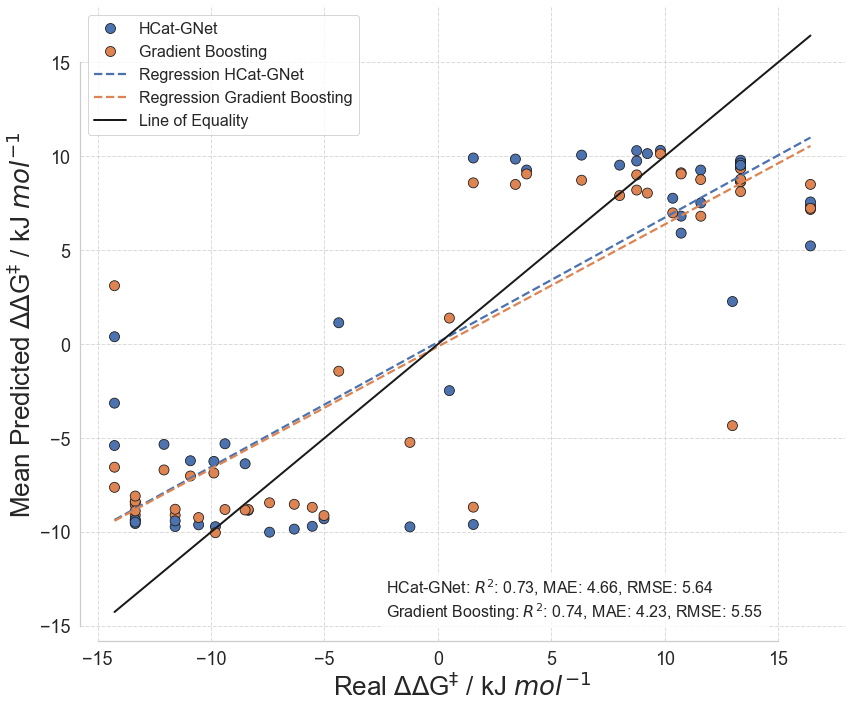

In [13]:
plot_mean_predictions(results_test)

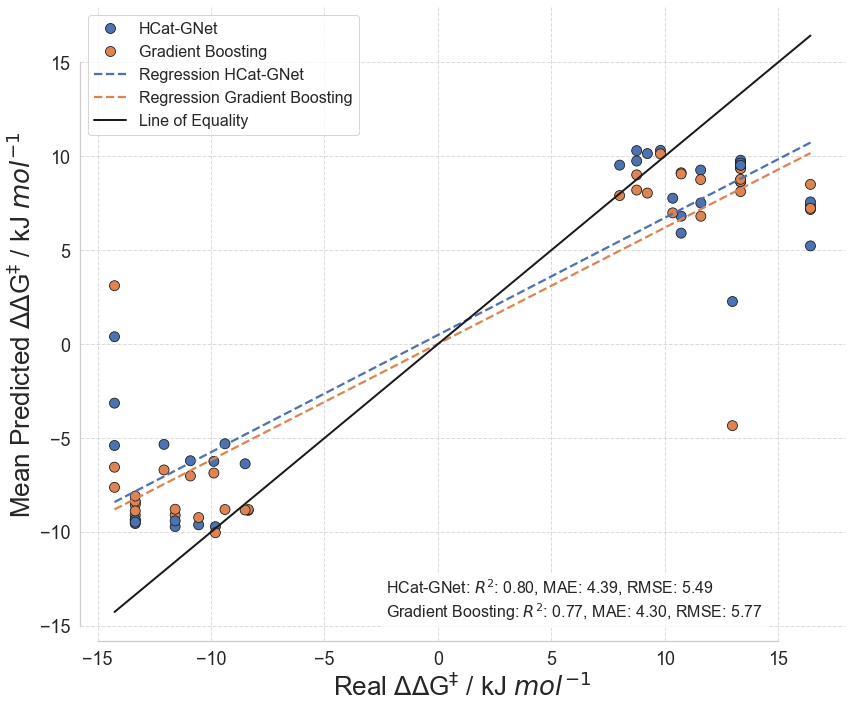

In [14]:
high_sel = results_test.loc[abs(results_test['ee']) > 90]
plot_mean_predictions(high_sel)

In [15]:
high_sel.loc[abs(high_sel['error']) >5]

,index,Method,mean_predicted_ddG,real_ddG,ee,temp,error,predicted_ee,error_ee
index,,,,,,,,,
6,6,Gradient Boosting,-8.087109,-13.341990,99,30,-5.254882,-92.230443,6.769557
15,15,Gradient Boosting,8.115103,13.341990,99,30,5.226887,92.312959,6.687041
22,22,HCat-GNet,0.393238,-14.256616,98,100,-14.649854,6.328847,91.671153
22,22,Gradient Boosting,3.108495,-14.256615,98,100,-17.365110,46.286955,51.713045
23,23,HCat-GNet,2.267065,12.982928,97,100,10.715863,34.992168,62.007832
23,23,Gradient Boosting,-4.339816,12.982928,97,100,17.322744,-60.398284,36.601716
24,24,HCat-GNet,-3.142413,-14.256616,98,100,-11.114203,-46.715379,51.284621
24,24,Gradient Boosting,-7.623620,-14.256615,98,100,-6.632995,-84.217371,13.782629
25,25,HCat-GNet,5.227358,16.422773,99,100,11.195415,68.709279,30.290721


In [16]:
low_sel = results_test.loc[abs(results_test['ee']) <= 90]
low_sel.loc[(low_sel['ee'] <=90) & (abs(low_sel['predicted_ee']) <=90)]

,index,Method,mean_predicted_ddG,real_ddG,ee,temp,error,predicted_ee,error_ee
index,,,,,,,,,
46,46,HCat-GNet,1.135766,-4.372132,70,30,-5.507898,22.156568,47.843432
46,46,Gradient Boosting,-1.442774,-4.372133,70,30,-2.929358,-27.863664,42.136336
48,48,HCat-GNet,-2.476456,0.505799,10,30,2.982255,-45.521188,-35.521188
48,48,Gradient Boosting,1.385886,0.505799,10,30,-0.880087,26.819546,-16.819546
49,49,Gradient Boosting,-5.232065,-1.233926,24,30,3.998138,-77.705165,-53.705165


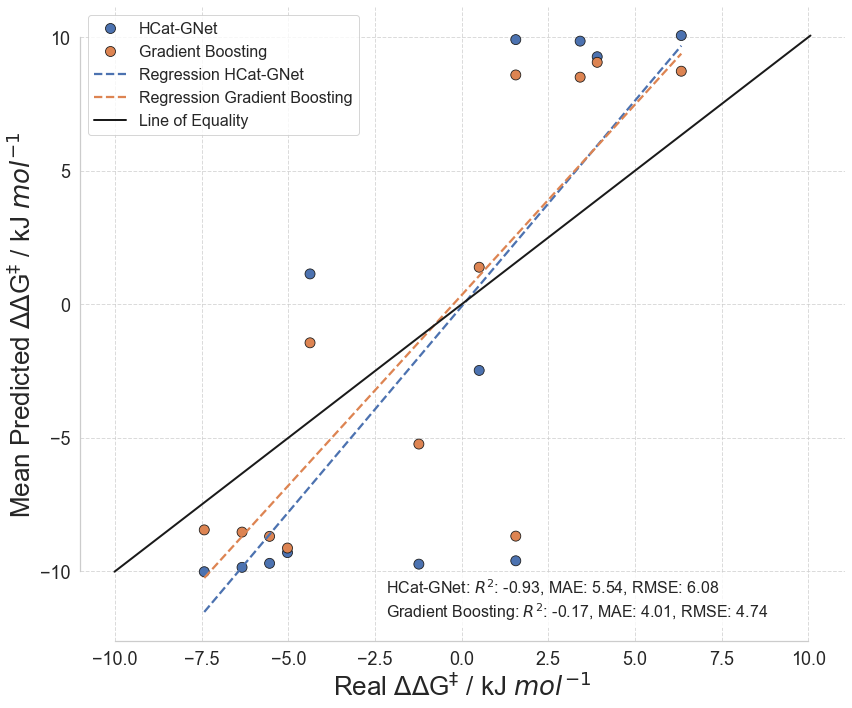

In [17]:
plot_mean_predictions(low_sel)

In [18]:
results_test.loc[39:41]

,index,Method,mean_predicted_ddG,real_ddG,ee,temp,error,predicted_ee,error_ee
index,,,,,,,,,
39,39,HCat-GNet,-9.846743,-6.332368,85,30,3.514375,-96.057526,-11.057526
39,39,Gradient Boosting,-8.527152,-6.332369,85,30,2.194783,-93.434210,-8.434210
40,40,HCat-GNet,-9.295474,-5.022001,76,30,4.273472,-95.117234,-19.117234
40,40,Gradient Boosting,-9.123845,-5.022001,76,30,4.101844,-94.782153,-18.782153
41,41,HCat-GNet,-9.716867,-9.809491,96,30,-0.092624,-95.853378,0.146622
41,41,Gradient Boosting,-10.038662,-9.809491,96,30,0.229171,-96.341282,-0.341282


In [19]:
results_test.loc[42:44]

,index,Method,mean_predicted_ddG,real_ddG,ee,temp,error,predicted_ee,error_ee
index,,,,,,,,,
42,42,HCat-GNet,10.297190,8.761648,94,30,-1.535542,96.692048,-2.692048
42,42,Gradient Boosting,9.007135,8.761648,94,30,-0.245487,94.541616,-0.541616
43,43,HCat-GNet,9.265158,3.908344,65,30,-5.356815,95.059613,-30.059613
43,43,Gradient Boosting,9.054820,3.908344,65,30,-5.146477,94.641169,-29.641169
44,44,HCat-GNet,10.310783,9.809491,96,30,-0.501292,96.709546,-0.709546
44,44,Gradient Boosting,10.126389,9.809491,96,30,-0.316897,96.464220,-0.464220


In [20]:
results_test.loc[[45,46,48]]

,index,Method,mean_predicted_ddG,real_ddG,ee,temp,error,predicted_ee,error_ee
index,,,,,,,,,
45,45,HCat-GNet,-9.696648,-5.538194,80,30,4.158455,-95.820680,-15.820680
45,45,Gradient Boosting,-8.686533,-5.538194,80,30,3.148339,-93.824107,-13.824107
46,46,HCat-GNet,1.135766,-4.372132,70,30,-5.507898,22.156568,47.843432
46,46,Gradient Boosting,-1.442774,-4.372133,70,30,-2.929358,-27.863664,42.136336
48,48,HCat-GNet,-2.476456,0.505799,10,30,2.982255,-45.521188,-35.521188
48,48,Gradient Boosting,1.385886,0.505799,10,30,-0.880087,26.819546,-16.819546


In [21]:
results_test.loc[49:51]

,index,Method,mean_predicted_ddG,real_ddG,ee,temp,error,predicted_ee,error_ee
index,,,,,,,,,
49,49,HCat-GNet,-9.727059,-1.233926,24,30,8.493133,-95.869767,-71.869767
49,49,Gradient Boosting,-5.232065,-1.233926,24,30,3.998138,-77.705165,-53.705165
50,50,HCat-GNet,-9.601031,1.560313,30,30,11.161345,-95.662596,-65.662596
50,50,Gradient Boosting,-8.678170,1.560314,30,30,10.238483,-93.804217,-63.804217
51,51,HCat-GNet,9.847910,3.416170,59,30,-6.431740,96.059314,-37.059314
51,51,Gradient Boosting,8.499007,3.416170,59,30,-5.082837,93.362930,-34.362930


In [22]:
results_test = pd.read_csv('/Users/ed_aguilar/Documents/Github/hcatgnet/results/all_data/learning_set/GNN_vs_gb/predictions_all.csv')

ees = pd.read_csv('/Users/ed_aguilar/Documents/Github/hcatgnet/data/datasets/rhcaa_final_test/raw/final_test.csv', usecols=['index', 'ee', 'temp'])

results_test = results_test.groupby(['index', 'Method']).agg(
    mean_predicted_ddG=('predicted_ddG', 'mean'),
    real_ddG=('real_ddG', 'first')
).reset_index()

results_test.loc[results_test['Method'] == 'gb', 'Method'] = 'Gradient Boosting'
results_test.loc[results_test['Method'] == 'GNN', 'Method'] = 'HCat-GNet'

results_test = results_test.loc[results_test['index'] >= 668]
results_test['index'] = results_test['index'] - 668
results_test = results_test.reset_index(drop=True)
results_test

,index,Method,mean_predicted_ddG,real_ddG
0,0,HCat-GNet,-11.628983,-11.582187
1,0,Gradient Boosting,-8.947924,-11.582186
2,1,HCat-GNet,-11.948452,-10.547433
3,1,Gradient Boosting,-13.069914,-10.547433
4,2,HCat-GNet,-10.164835,-13.341990
...,...,...,...,...
99,49,Gradient Boosting,0.627034,-1.233926
100,50,HCat-GNet,-3.608954,1.560313
101,50,Gradient Boosting,-4.856265,1.560314
102,51,HCat-GNet,5.703624,3.416170


In [23]:
results_test = pd.merge(results_test, ees, on='index')
results_test.index = results_test['index']
results_test['error'] = results_test['real_ddG'] - results_test['mean_predicted_ddG']

R=8.3145

results_test['predicted_ee'] = 100 * (np.exp(results_test['mean_predicted_ddG'] * 1000 / (R * (results_test['temp']+273.15))) - 1) / (np.exp(results_test['mean_predicted_ddG'] * 1000 / (R * (results_test['temp']+273.15))) + 1)

results_test['error_ee'] = results_test['ee'] - abs(results_test['predicted_ee'])

results_test

,index,Method,mean_predicted_ddG,real_ddG,ee,temp,error,predicted_ee,error_ee
index,,,,,,,,,
0,0,HCat-GNet,-11.628983,-11.582187,98,30,0.046796,-98.036429,-0.036429
0,0,Gradient Boosting,-8.947924,-11.582186,98,30,-2.634263,-94.415495,3.584505
1,1,HCat-GNet,-11.948452,-10.547433,97,30,1.401019,-98.268153,-1.268153
1,1,Gradient Boosting,-13.069914,-10.547433,97,30,2.522481,-98.886649,-1.886649
2,2,HCat-GNet,-10.164835,-13.341990,99,30,-3.177155,-96.516810,2.483190
...,...,...,...,...,...,...,...,...,...
49,49,Gradient Boosting,0.627034,-1.233926,24,30,-1.860960,12.374721,11.625279
50,50,HCat-GNet,-3.608954,1.560313,30,30,5.169268,-61.436866,-31.436866
50,50,Gradient Boosting,-4.856265,1.560314,30,30,6.416579,-74.576212,-44.576212


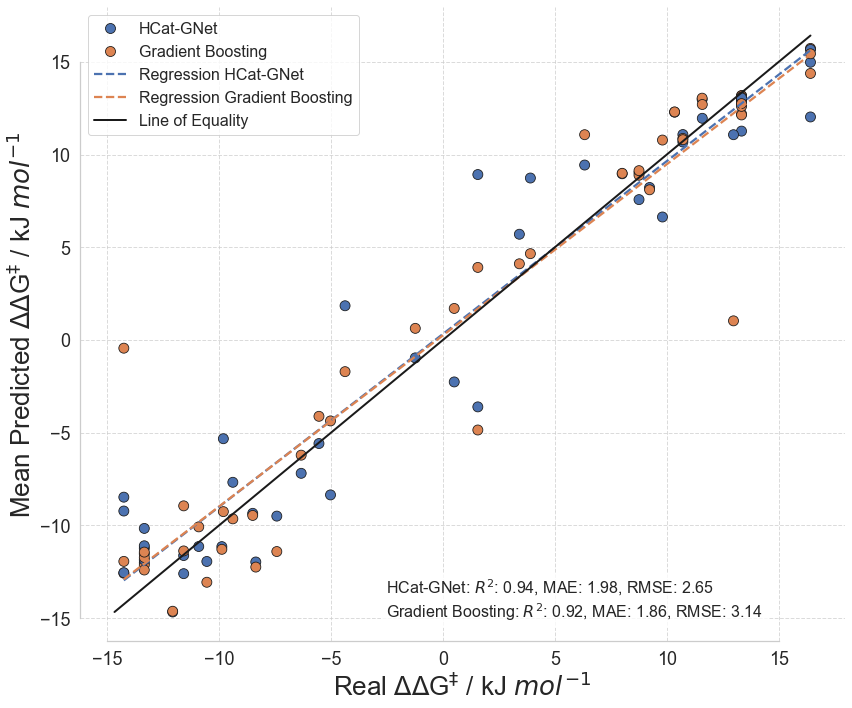

In [24]:
#results_test.index = results_test['index']
#results_test = results_test.loc[668:]
plot_mean_predictions(results_test)

In [25]:
low_sel = results_test.loc[abs(results_test['ee']) <= 90]
print(low_sel.shape)
low_sel.loc[(low_sel['ee'] <=90) & (abs(low_sel['predicted_ee']) <=90)]

(24, 9)


,index,Method,mean_predicted_ddG,real_ddG,ee,temp,error,predicted_ee,error_ee
index,,,,,,,,,
39,39,HCat-GNet,-7.193286,-6.332368,85,30,0.860918,-89.103639,-4.103639
39,39,Gradient Boosting,-6.214329,-6.332369,85,30,-0.118039,-84.337149,0.662851
40,40,Gradient Boosting,-4.366756,-5.022001,76,30,-0.655245,-69.945567,6.054433
43,43,Gradient Boosting,4.656285,3.908344,65,30,-0.747941,72.762798,-7.762798
45,45,HCat-GNet,-5.586456,-5.538194,80,30,0.048262,-80.342022,-0.342022
45,45,Gradient Boosting,-4.118007,-5.538194,80,30,-1.420187,-67.337336,12.662664
46,46,HCat-GNet,1.846211,-4.372132,70,30,-6.218344,35.069255,34.930745
46,46,Gradient Boosting,-1.708415,-4.372133,70,30,-2.663717,-32.649376,37.350624
47,47,Gradient Boosting,3.914375,1.560314,30,30,-2.354062,65.069043,-35.069043


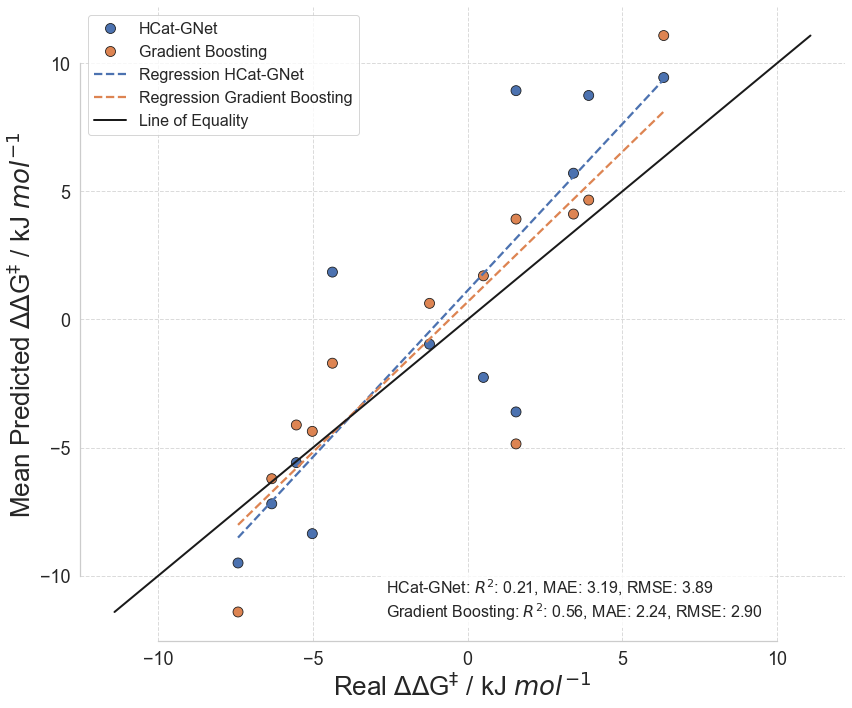

In [26]:
plot_mean_predictions(low_sel)

In [27]:
results_test.loc[39:41]

,index,Method,mean_predicted_ddG,real_ddG,ee,temp,error,predicted_ee,error_ee
index,,,,,,,,,
39,39,HCat-GNet,-7.193286,-6.332368,85,30,0.860918,-89.103639,-4.103639
39,39,Gradient Boosting,-6.214329,-6.332369,85,30,-0.118039,-84.337149,0.662851
40,40,HCat-GNet,-8.357498,-5.022001,76,30,3.335497,-92.993080,-16.993080
40,40,Gradient Boosting,-4.366756,-5.022001,76,30,-0.655245,-69.945567,6.054433
41,41,HCat-GNet,-5.326565,-9.809491,96,30,-4.482926,-78.437122,17.562878
41,41,Gradient Boosting,-9.260415,-9.809491,96,30,-0.549076,-95.050538,0.949462


In [28]:
results_test.loc[42:44]

,index,Method,mean_predicted_ddG,real_ddG,ee,temp,error,predicted_ee,error_ee
index,,,,,,,,,
42,42,HCat-GNet,7.572227,8.761648,94,30,1.189421,90.552767,3.447233
42,42,Gradient Boosting,9.134833,8.761648,94,30,-0.373185,94.804259,-0.804259
43,43,HCat-GNet,8.736285,3.908344,65,30,-4.827941,93.941158,-28.941158
43,43,Gradient Boosting,4.656285,3.908344,65,30,-0.747941,72.762798,-7.762798
44,44,HCat-GNet,6.634699,9.809491,96,30,3.174792,86.581733,9.418267
44,44,Gradient Boosting,10.784621,9.809491,96,30,-0.975130,97.265747,-1.265747


In [29]:
results_test.loc[[45,46,48]]

,index,Method,mean_predicted_ddG,real_ddG,ee,temp,error,predicted_ee,error_ee
index,,,,,,,,,
45,45,HCat-GNet,-5.586456,-5.538194,80,30,0.048262,-80.342022,-0.342022
45,45,Gradient Boosting,-4.118007,-5.538194,80,30,-1.420187,-67.337336,12.662664
46,46,HCat-GNet,1.846211,-4.372132,70,30,-6.218344,35.069255,34.930745
46,46,Gradient Boosting,-1.708415,-4.372133,70,30,-2.663717,-32.649376,37.350624
48,48,HCat-GNet,-2.263117,0.505799,10,30,2.768916,-42.102304,-32.102304
48,48,Gradient Boosting,1.700860,0.505799,10,30,-1.195061,32.515413,-22.515413


In [30]:
results_test.loc[49:51]

,index,Method,mean_predicted_ddG,real_ddG,ee,temp,error,predicted_ee,error_ee
index,,,,,,,,,
49,49,HCat-GNet,-0.965571,-1.233926,24,30,-0.268355,-18.923189,5.076811
49,49,Gradient Boosting,0.627034,-1.233926,24,30,-1.860960,12.374721,11.625279
50,50,HCat-GNet,-3.608954,1.560313,30,30,5.169268,-61.436866,-31.436866
50,50,Gradient Boosting,-4.856265,1.560314,30,30,6.416579,-74.576212,-44.576212
51,51,HCat-GNet,5.703624,3.416170,59,30,-2.287454,81.150767,-22.150767
51,51,Gradient Boosting,4.110007,3.416170,59,30,-0.693837,67.250505,-8.250505


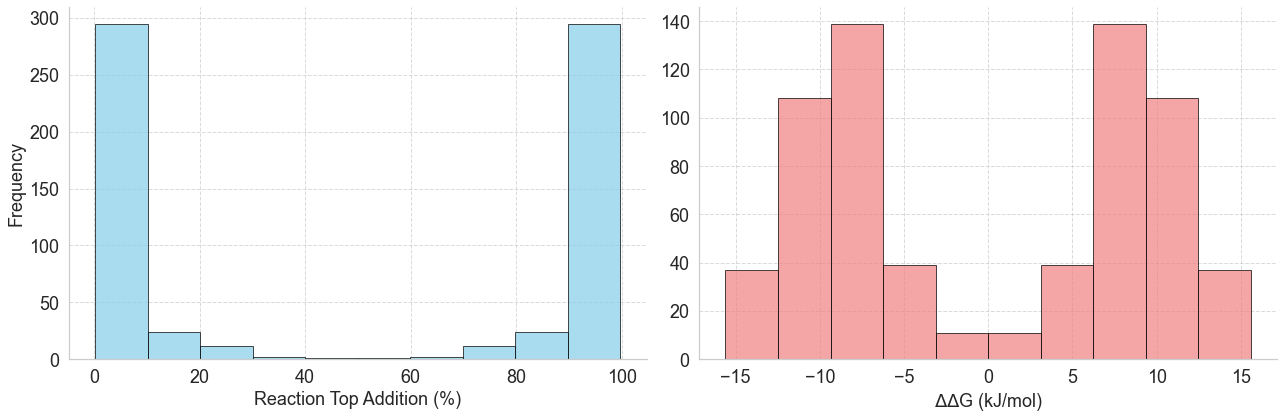

In [31]:
reactions_learning = pd.read_csv('/Users/ed_aguilar/Documents/Github/hcatgnet/data/datasets/rhcaa_learning/raw/learning.csv')
plot_distribution(reactions_learning)

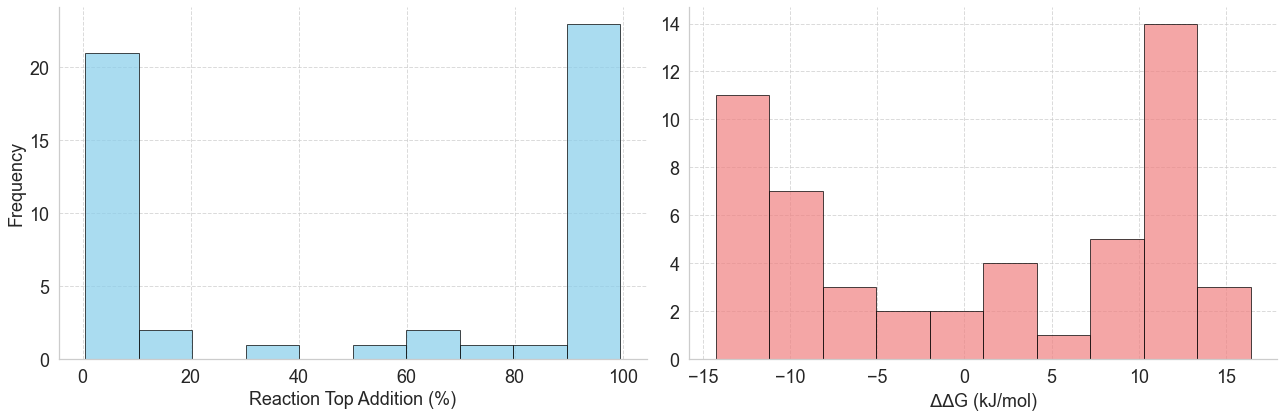

In [32]:
reactions_test = pd.read_csv('/Users/ed_aguilar/Documents/Github/hcatgnet/data/datasets/rhcaa_final_test/raw/final_test.csv')
plot_distribution(reactions_test)